In [1]:
!pip install astsadata statsmodels --upgrade

     |████████████████████████████████| 481kB 6.3MB/s 
     |████████████████████████████████| 9.5MB 9.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from astsadata import *

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [3]:
def ccf(x, y, max_lag, ccf_type="correlation", ax=None, **kwargs):
    lags = np.arange(-max_lag, max_lag + 1)

    if ccf_type == "correlation":
        backwards = sm.tsa.ccf(x[::-1], y[::-1], adjusted=False)[max_lag::-1]
        forwards = sm.tsa.ccf(x, y, adjusted=False)[:max_lag + 1]
        ccf = np.r_[backwards[:-1], forwards]
        ylabel = "CCF"
    elif ccf_type == "covariance":
        backwards = sm.tsa.ccovf(x[::-1], y[::-1], adjusted=False)[max_lag::-1]
        forwards = sm.tsa.ccovf(x, y, adjusted=False)[:max_lag + 1]
        ccf = np.r_[backwards[:-1], forwards]
        ylabel = "CCoV"

    if ax is None:
        ax = plt.gca()
    
    ax.bar(lags, ccf, **kwargs)
    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(0, color="black", linestyle="--", linewidth=1)
    if ccf_type == "correlation":
        conf_level = 1.96 / np.sqrt(x.shape[0])
        ax.axhline(conf_level, color="red", linestyle="--", linewidth=1)
        ax.axhline(-conf_level, color="red", linestyle="--", linewidth=1)
    ax.set_xlabel("LAG")
    ax.set_ylabel(ylabel)

    return ax

# Section 1.4 Stationary Time Series


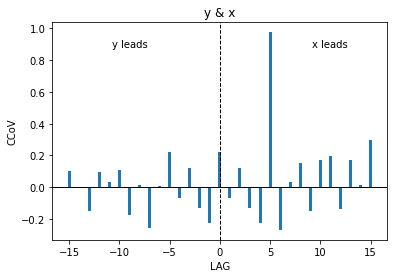

In [4]:
# Example 1.24
np.random.seed(2)
x = pd.Series(data=np.random.normal(size=100))
y = x.shift(5) + np.random.normal(size=100)

ax = ccf(y.dropna(), x, max_lag=15, ccf_type="covariance", width=.3)
ax.text(11, .9, "x leads", horizontalalignment='center',
        verticalalignment='center')
ax.text(-9, .9, "y leads", horizontalalignment='center',
        verticalalignment='center')
ax.set_title("y & x")
plt.show()